# 04 - Exploratory Data Analysis

## Import Libraries

In [2]:
import pandas as pd
import json
import numpy as np


import sys
sys.path.append('/Users/antoniooliveira/Projects/NTT Project')
import functions

import plotly.express as px
import plotly.graph_objects as go

path = '/Users/antoniooliveira/Downloads/NTT project/original_data'
#path = "C:/Users/aprataso/Downloads/final_data"

In [3]:
pd.reset_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Data

In [4]:
customer_info = pd.read_csv(f'{path}/801_cust_info.csv')

Deserialize the necessary columns

In [5]:
customer_info['quantity'] = customer_info['quantity'].apply(functions.deserialize_list)
customer_info['sales_value_eu'] = customer_info['sales_value_eu'].apply(functions.deserialize_list)
customer_info['department'] = customer_info['department'].apply(functions.deserialize_list)

### Initial Exploration

In [6]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              801 non-null    int64  
 1   marital_status_code     801 non-null    object 
 2   homeowner_desc          801 non-null    object 
 3   household_key           801 non-null    int64  
 4   marital_status          801 non-null    object 
 5   age_group               801 non-null    object 
 6   adult_category_size     801 non-null    float64
 7   has_kids                801 non-null    float64
 8   avg_age                 801 non-null    float64
 9   avg_income              801 non-null    int64  
 10  n_kids                  801 non-null    float64
 11  n_household             801 non-null    int64  
 12  gender(s)               801 non-null    float64
 13  quantity                801 non-null    object 
 14  retail_disc             801 non-null    fl

In [7]:
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.5f}'.format)

customer_info.describe().T

count        mean         std         min  \
Unnamed: 0            801.00000   400.00000   231.37308     0.00000   
household_key         801.00000  1235.17603   736.80465     1.00000   
adult_category_size   801.00000     1.56554     0.49600     1.00000   
has_kids              801.00000     0.23471     0.42408     0.00000   
avg_age               801.00000    44.05431    11.81672    21.50000   
avg_income            801.00000 64810.23720 46952.86408 15000.00000   
n_kids                801.00000     0.43196     0.87930     0.00000   
n_household           801.00000     2.19725     1.19312     1.00000   
gender(s)             801.00000     1.40075     0.75528     0.00000   
retail_disc           801.00000    -0.54561     0.20902    -2.49200   
coupon_disc           801.00000    -0.01900     0.03189    -0.40885   
coupon_match_disc     801.00000    -0.00360     0.00838    -0.10078   
Groceries_spend       801.00000  3537.52169  2319.37732   343.84000   
Delicacies_spend      801.00000   197.84679   225.41157     0.00000   
Meat_spend            801.00000   670.97673   523.09758     0.00000   
Bakery_spend          801.00000    87.56437    92.78210     0.00000   
DRUG GM_spend         801.00000   784.96799   752.57288    21.31000   
SALAD BAR_spend       801.00000    22.55551    56.55610     0.00000   
MISC SALES TRAN_spend 801.00000    94.53896   363.41899     0.00000   
RESTAURANT_spend      801.00000     1.75443    10.43367     0.00000   
FLORAL_spend          801.00000    28.90322    48.20592     0.00000   
COSMETICS_spend       801.00000    25.33633    47.48542     0.00000   
MISC. TRANS._spend    801.00000     6.10963    20.54149     0.00000   
Seafood_spend         801.00000    66.55758   103.78843     0.00000   
KIOSK-GAS_spend       801.00000   457.00155   749.82144     0.00000   
SPIRITS_spend         801.00000    15.86965   108.64897     0.00000   
CHEF SHOPPE_spend     801.00000     2.01341     6.02036     0.00000   
GARDEN CENTER_spend   801.00000     6.04266    19.08008     0.00000   
AUTOMOTIVE_spend      801.00000     0.28281     1.84943     0.00000   
CNTRL/STORE SUP_spend 801.00000     0.02412     0.40156     0.00000   
COUP/STR & MFG_spend  801.00000     0.78710     3.33096     0.00000   
TRAVEL & LEISUR_spend 801.00000     1.96131     5.45680     0.00000   
GM MERCH EXP_spend    801.00000     0.09292     0.82919     0.00000   
POSTAL CENTER_spend   801.00000     0.01581     0.17923     0.00000   
DELI/SNACK BAR_spend  801.00000     0.03278     0.53309     0.00000   
Photo/Video_spend     801.00000     0.06705     0.69408     0.00000   
RX_spend              801.00000     0.12760     1.50784     0.00000   
PROD-WHS SALES_spend  801.00000     0.01005     0.21164     0.00000   
PHARMACY SUPPLY_spend 801.00000     0.01596     0.28132     0.00000   
TOYS_spend            801.00000     0.00199     0.05618     0.00000   
HOUSEWARES_spend      801.00000     0.00400     0.11307     0.00000   
HBC_spend             801.00000     0.00270     0.07632     0.00000   
VIDEO RENTAL_spend    801.00000     0.00668     0.18903     0.00000   

                              25%         50%         75%          max  
Unnamed: 0              200.00000   400.00000   600.00000    800.00000  
household_key           596.00000  1218.00000  1914.00000   2499.00000  
adult_category_size       1.00000     2.00000     2.00000      2.00000  
has_kids                  0.00000     0.00000     0.00000      1.00000  
avg_age                  39.50000    49.50000    49.50000     65.00000  
avg_income            29500.00000 62000.00000 87000.00000 250000.00000  
n_kids                    0.00000     0.00000     0.00000      3.00000  
n_household               1.00000     2.00000     3.00000      5.00000  
gender(s)                 1.00000     2.00000     2.00000      2.00000  
retail_disc              -0.62181    -0.50001    -0.41790     -0.16113  
coupon_disc              -0.02221    -0.00833    -0.00296      0.00000  
coupon_match_disc        

In [8]:
pd.reset_option('display.max_rows', None)
pd.reset_option('display.max_colwidth', None)

## Missing Values

In [9]:
customer_info.isna().sum()

Unnamed: 0                0
marital_status_code       0
homeowner_desc            0
household_key             0
marital_status            0
age_group                 0
adult_category_size       0
has_kids                  0
avg_age                   0
avg_income                0
n_kids                    0
n_household               0
gender(s)                 0
quantity                  0
retail_disc               0
coupon_disc               0
coupon_match_disc         0
sales_value_eu            0
department                0
first_transaction_date    0
Groceries_spend           0
Delicacies_spend          0
Meat_spend                0
Bakery_spend              0
DRUG GM_spend             0
SALAD BAR_spend           0
MISC SALES TRAN_spend     0
RESTAURANT_spend          0
FLORAL_spend              0
COSMETICS_spend           0
MISC. TRANS._spend        0
Seafood_spend             0
KIOSK-GAS_spend           0
SPIRITS_spend             0
CHEF SHOPPE_spend         0
GARDEN CENTER_spend 

## Outliers

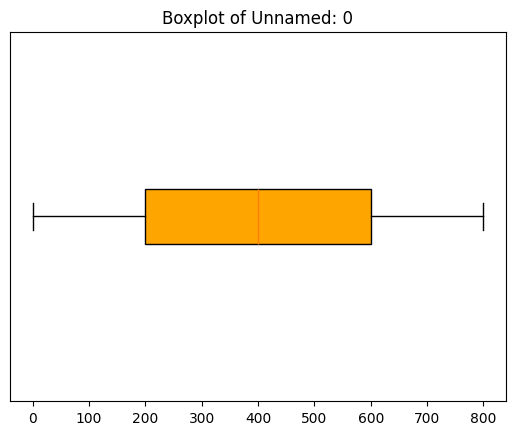

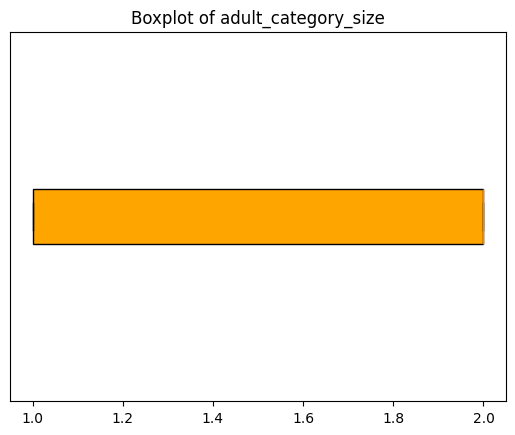

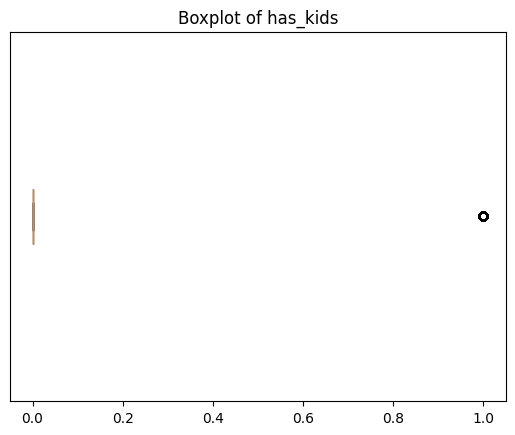

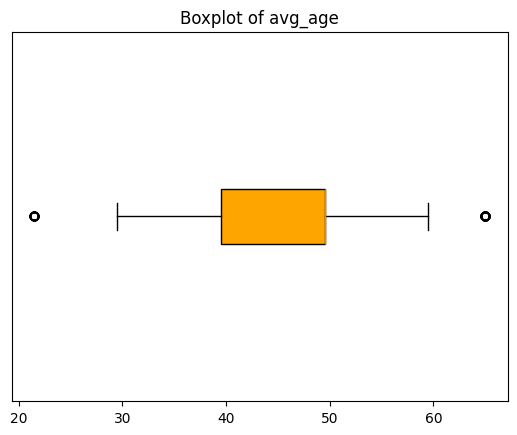

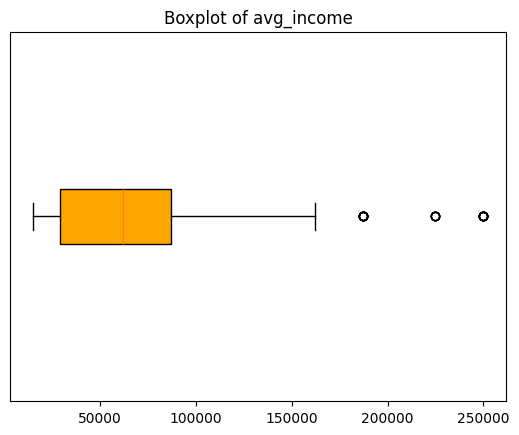

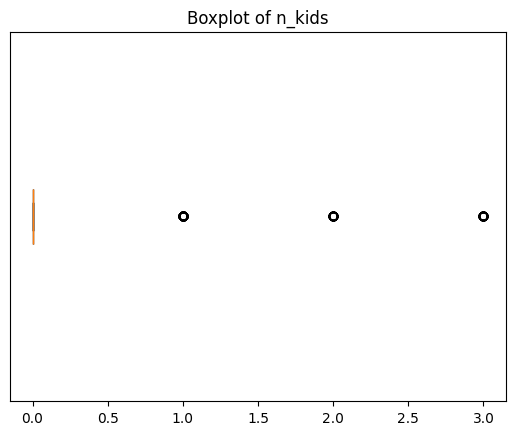

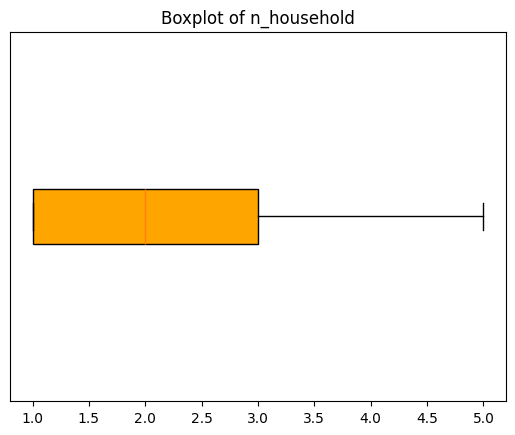

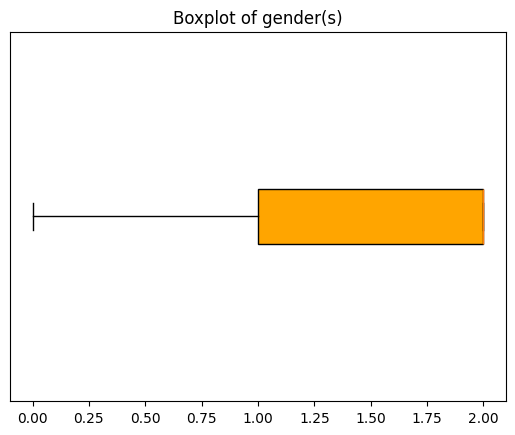

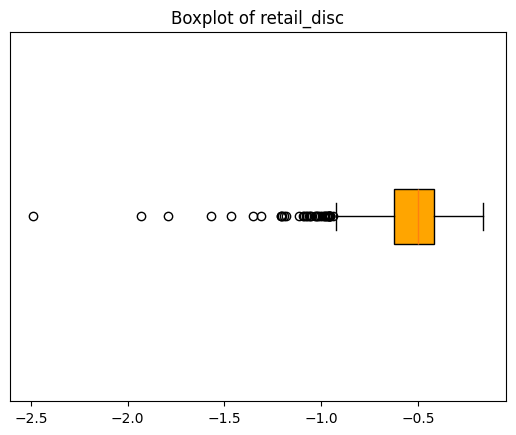

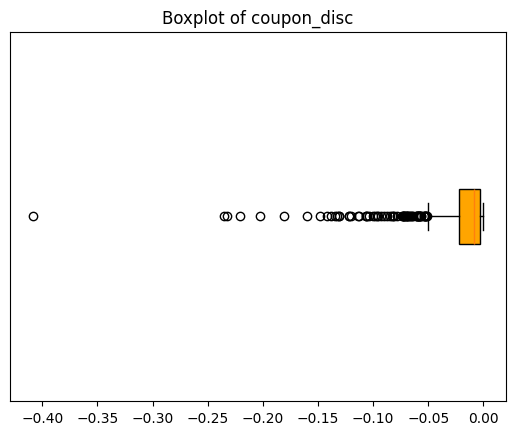

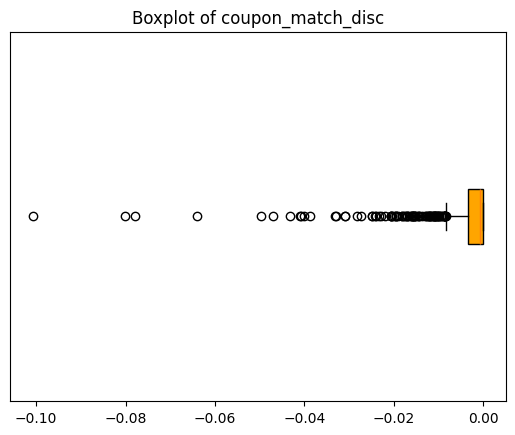

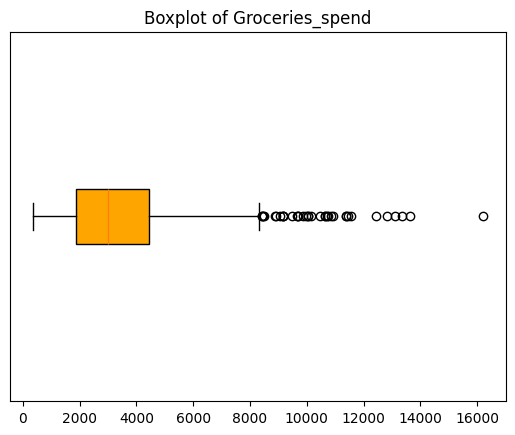

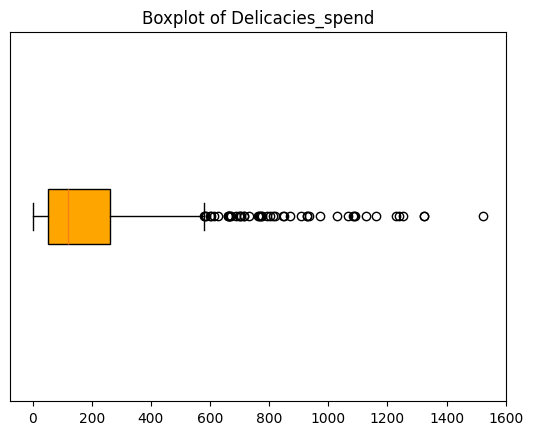

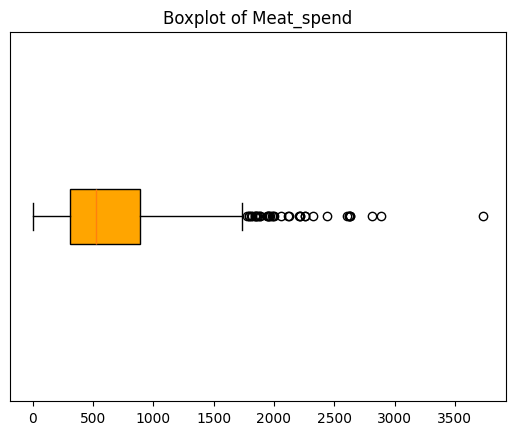

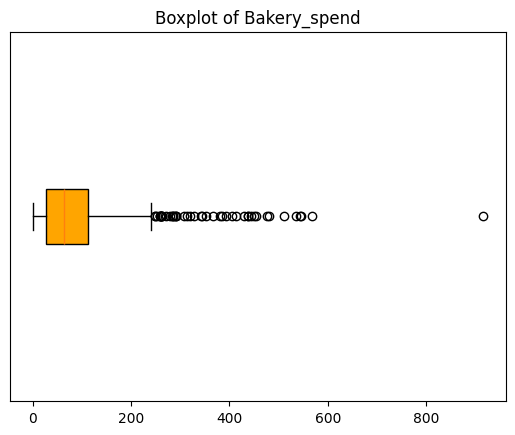

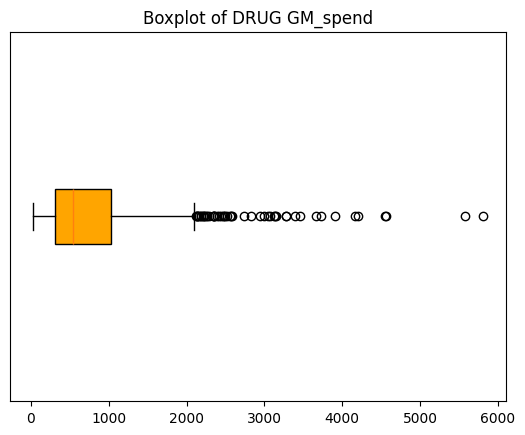

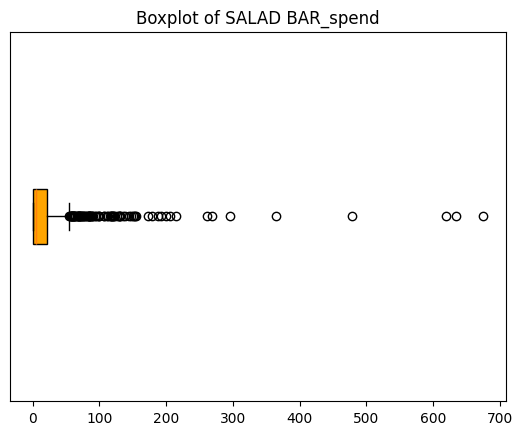

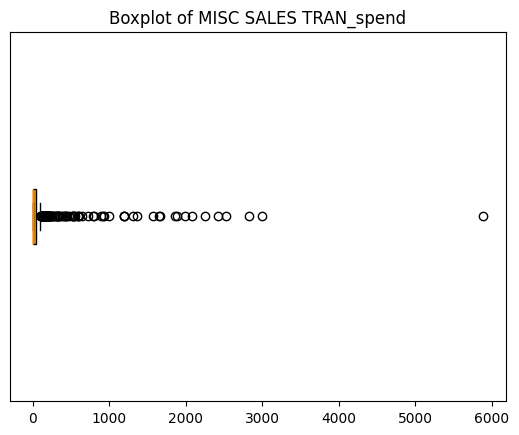

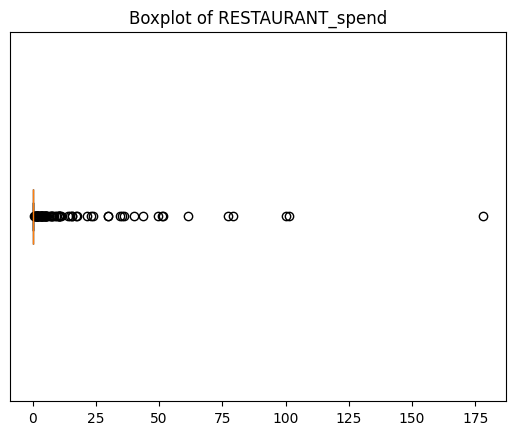

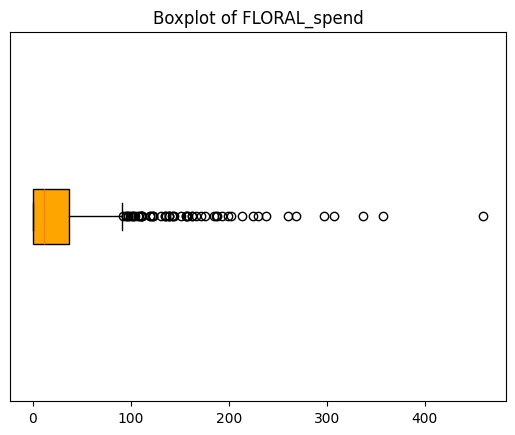

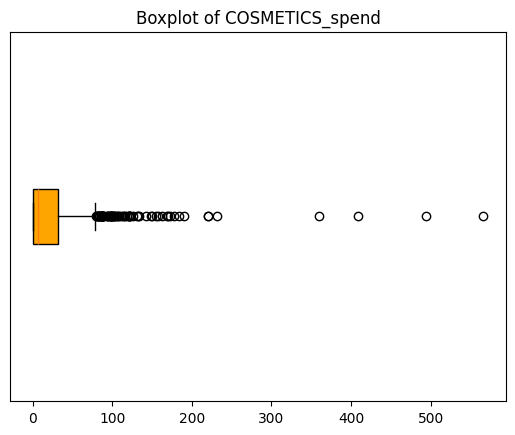

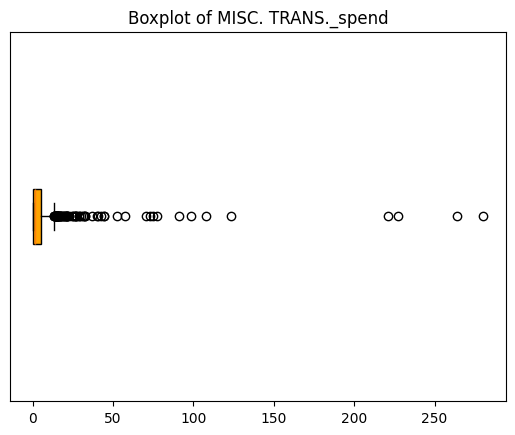

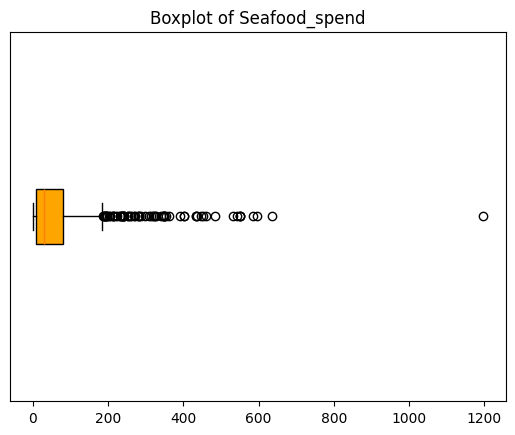

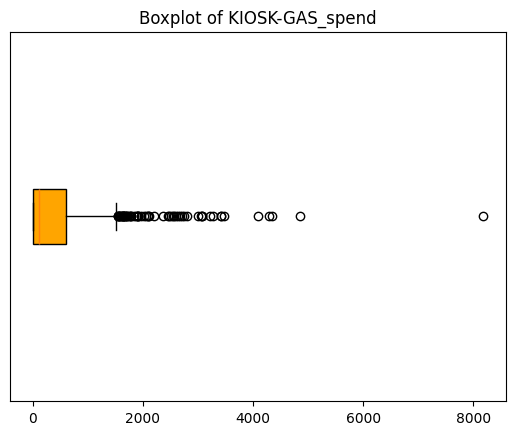

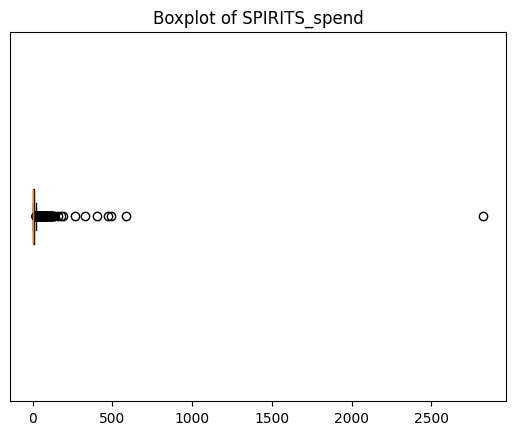

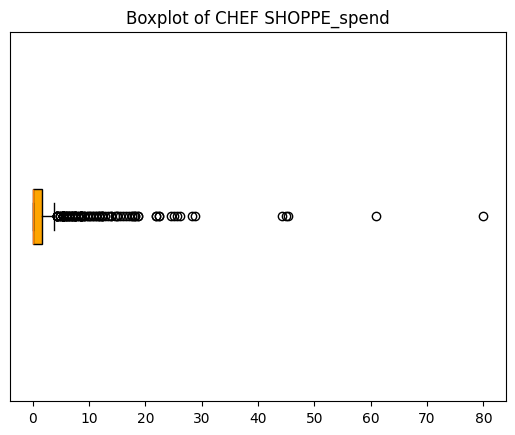

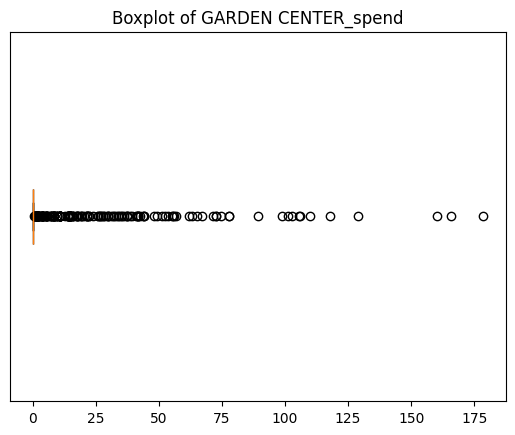

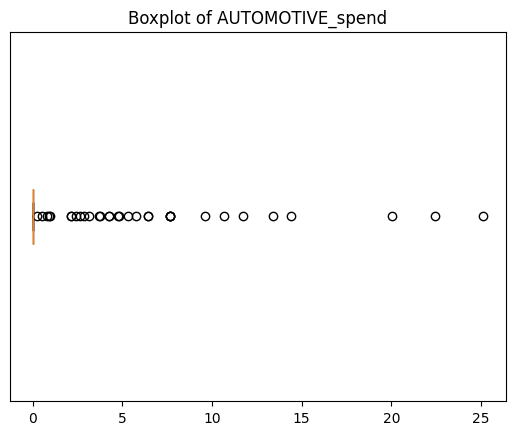

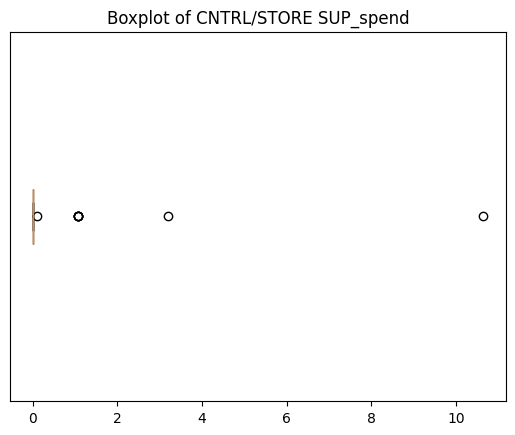

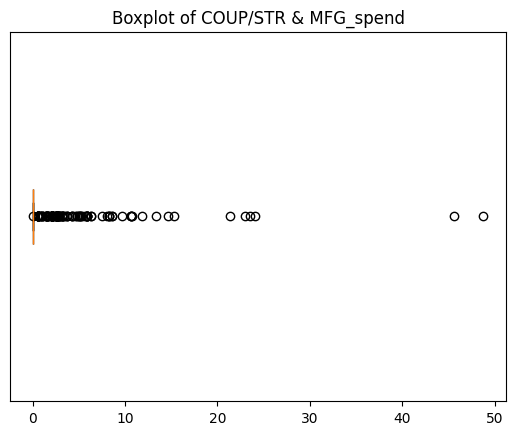

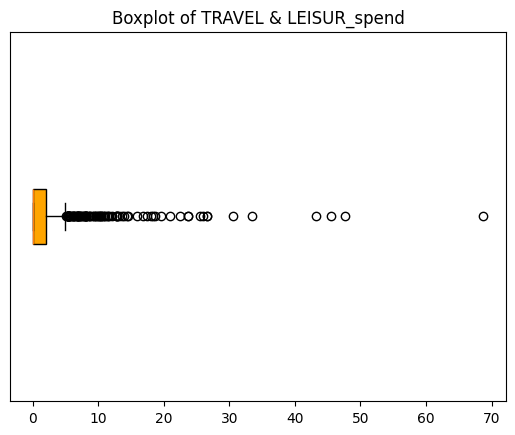

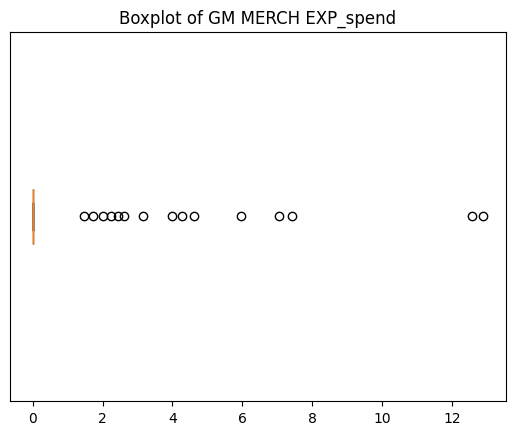

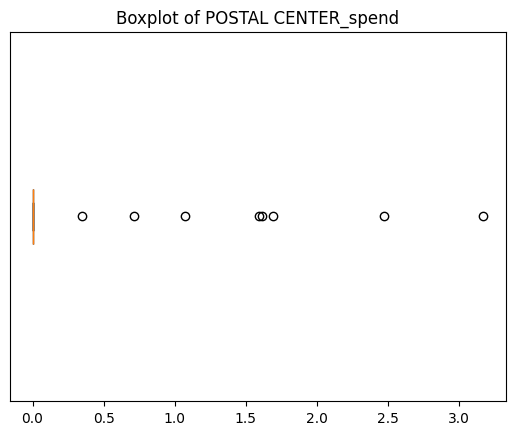

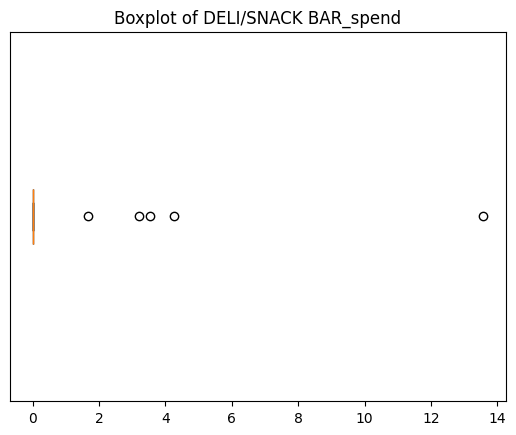

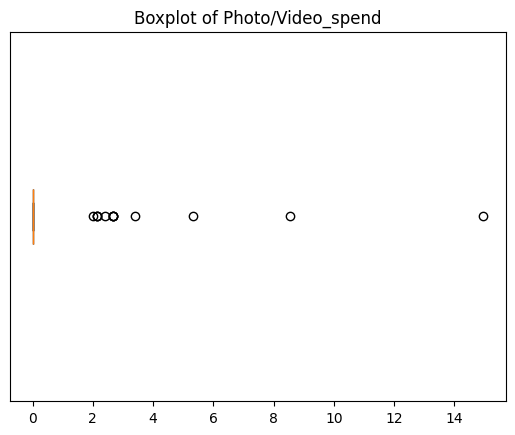

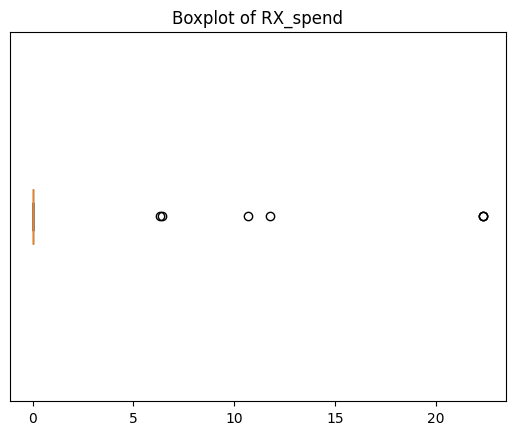

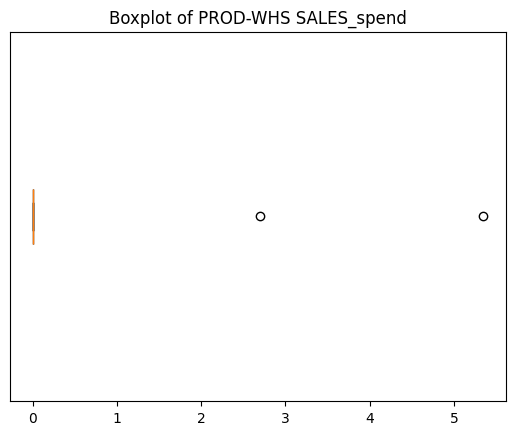

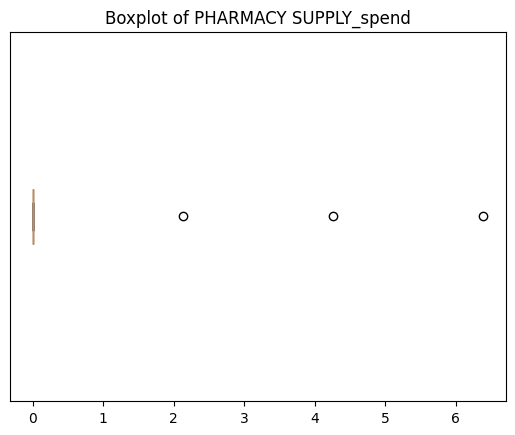

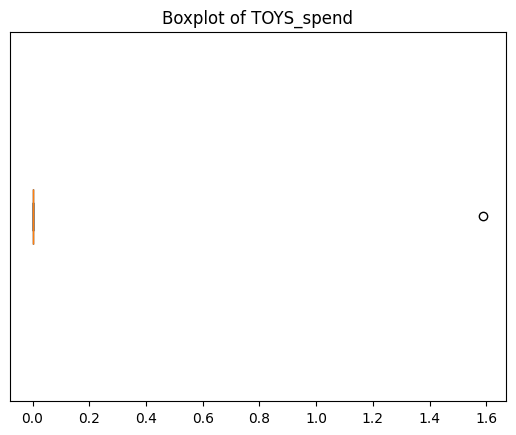

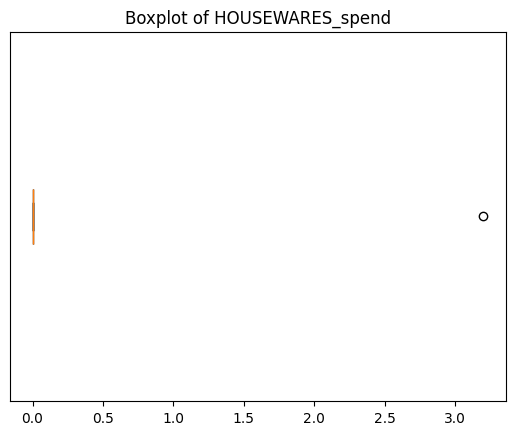

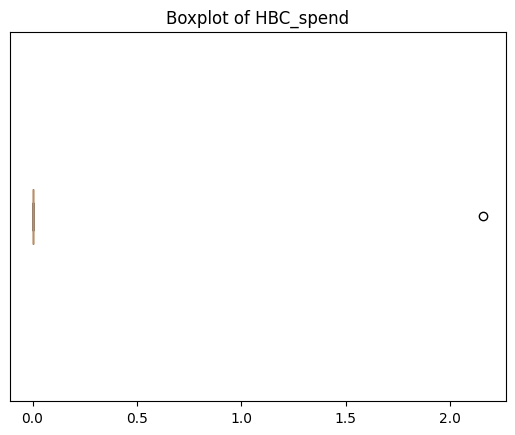

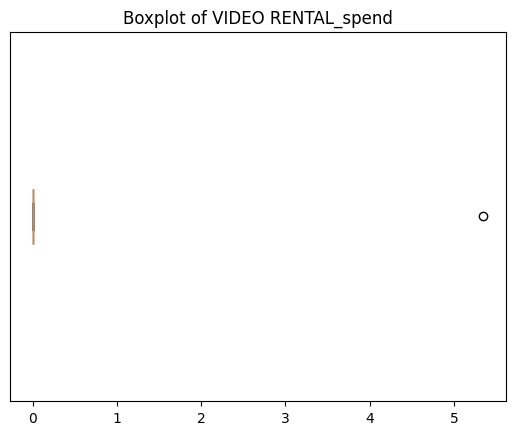

In [10]:
functions.graphs(customer_info.loc[:, customer_info.columns != 'household_key'], graph = 'boxplot')

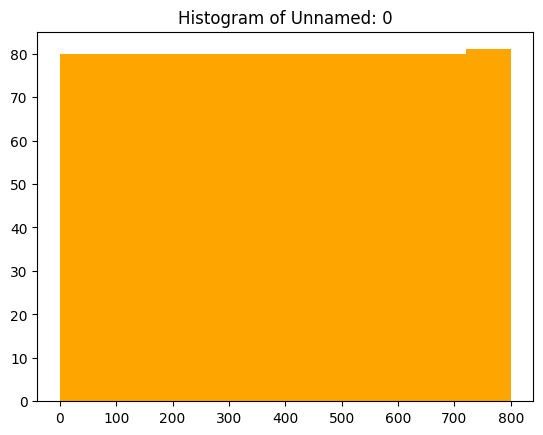

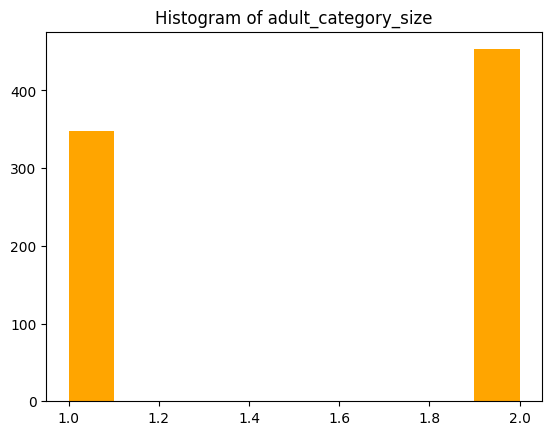

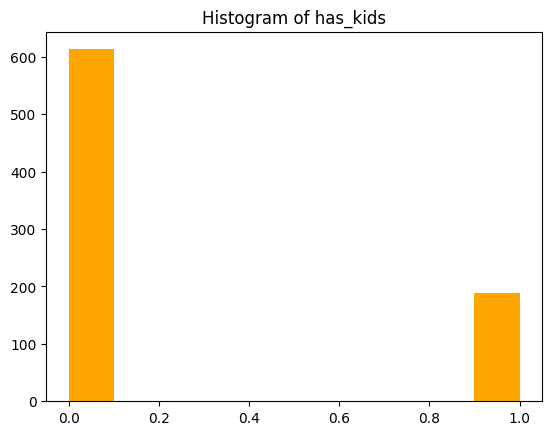

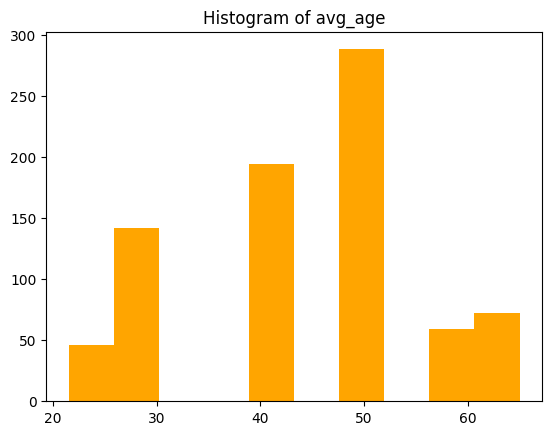

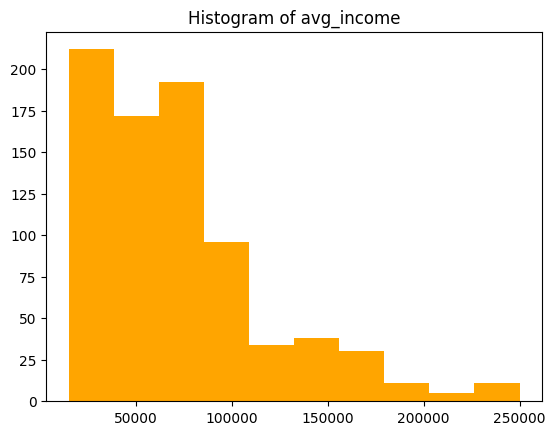

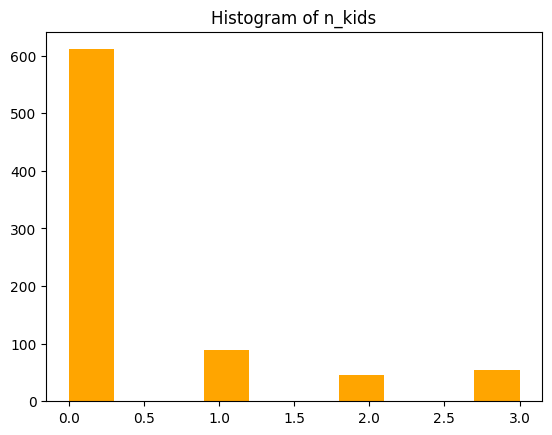

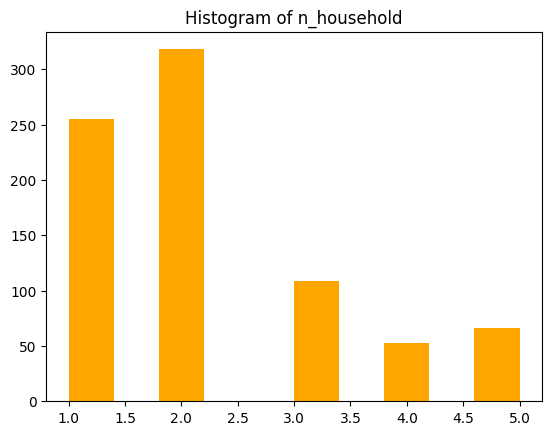

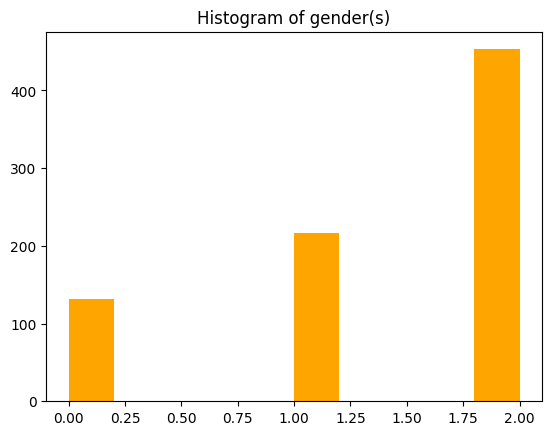

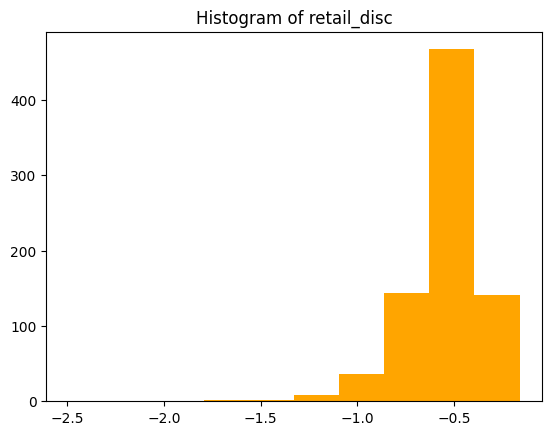

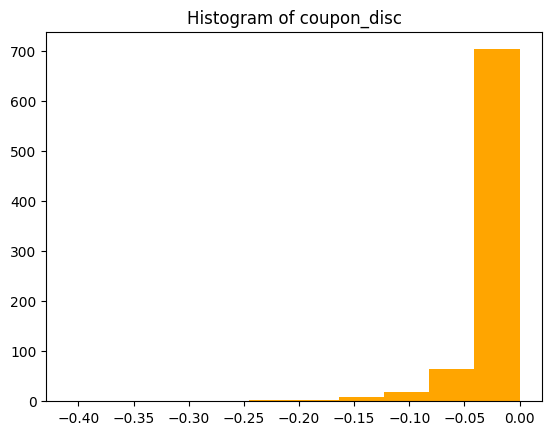

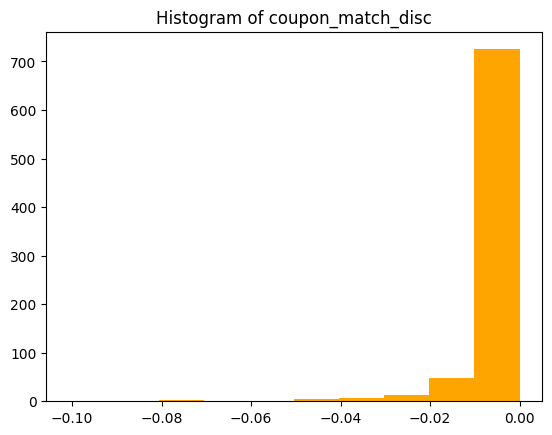

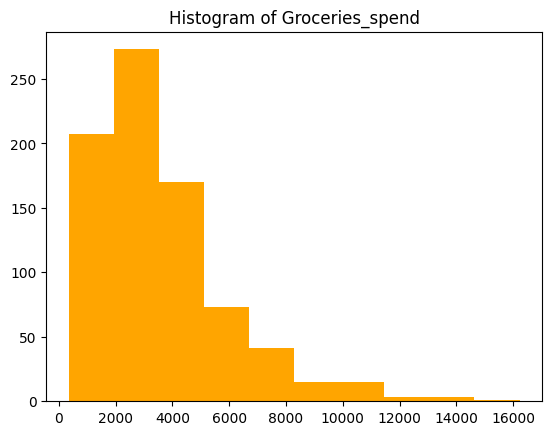

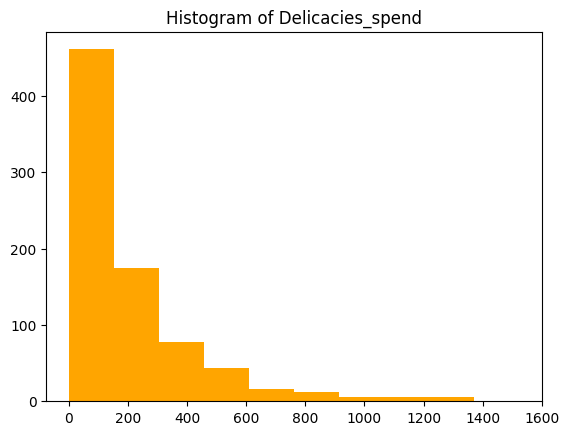

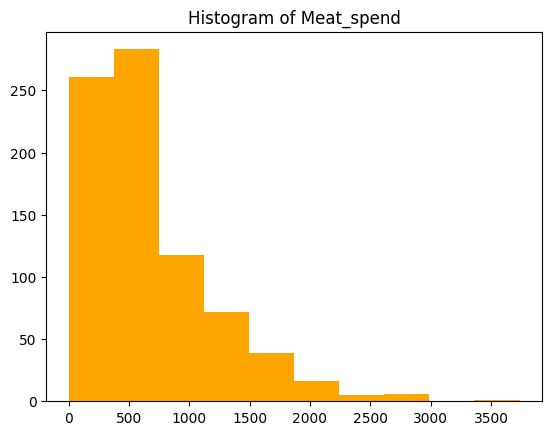

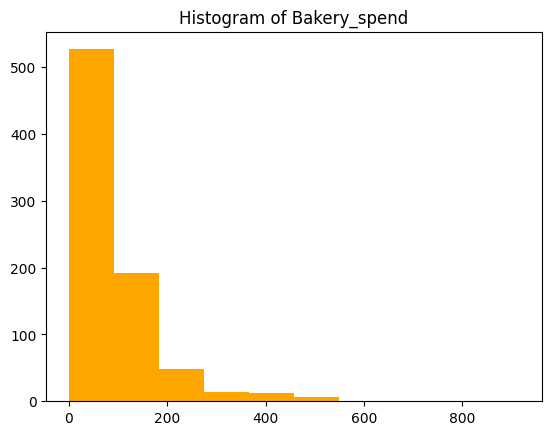

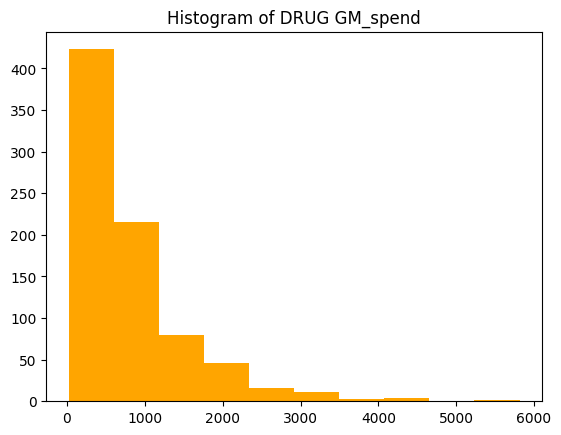

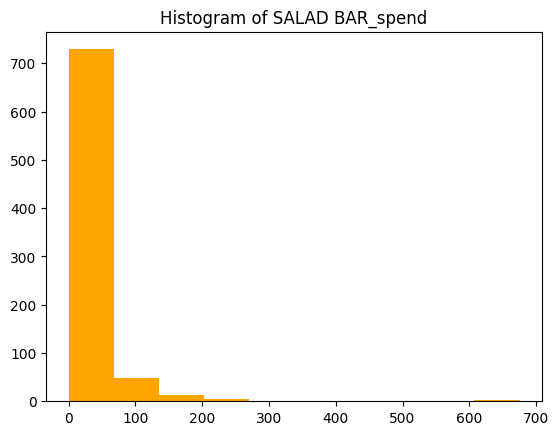

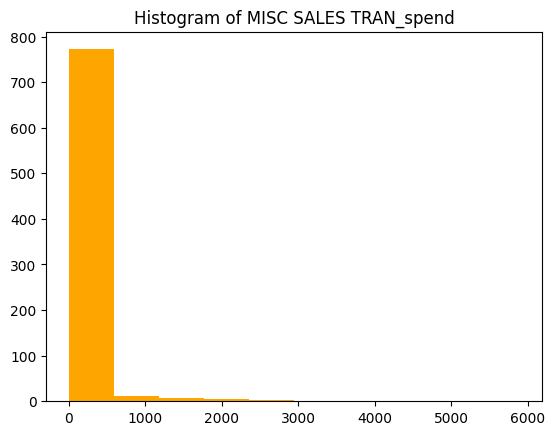

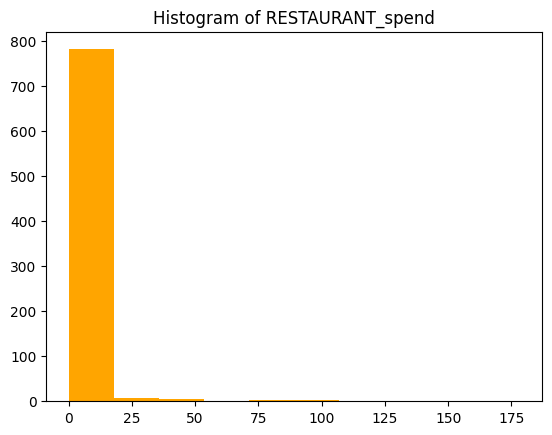

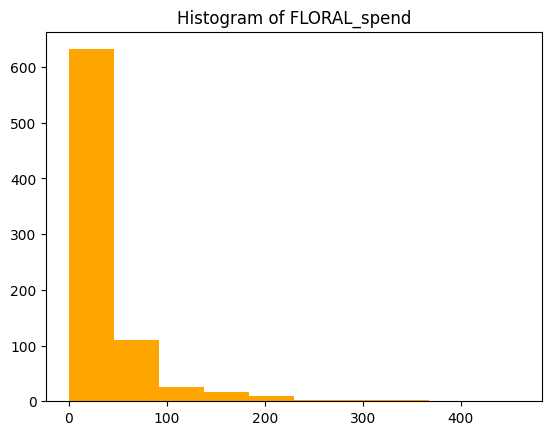

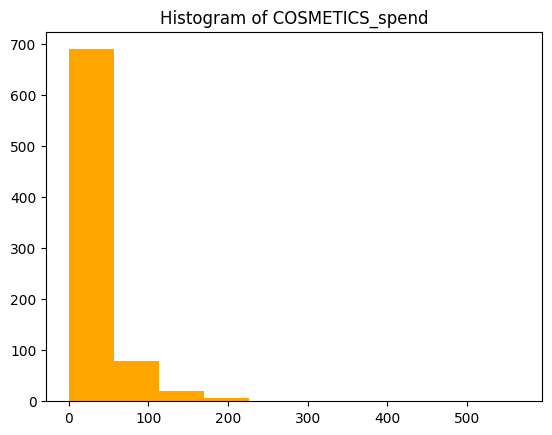

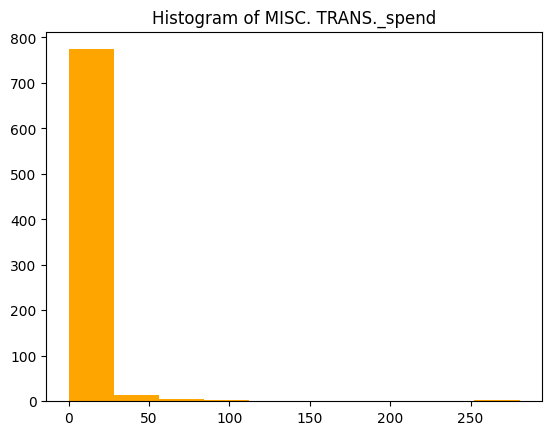

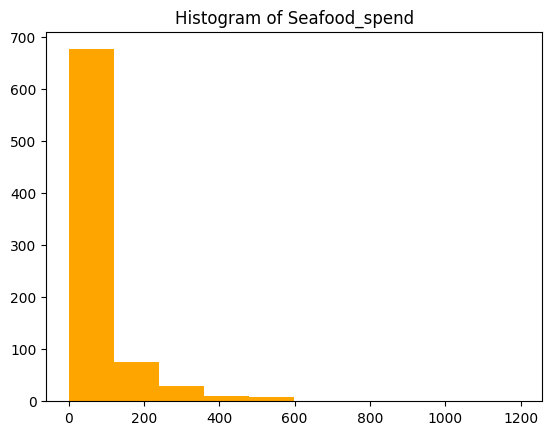

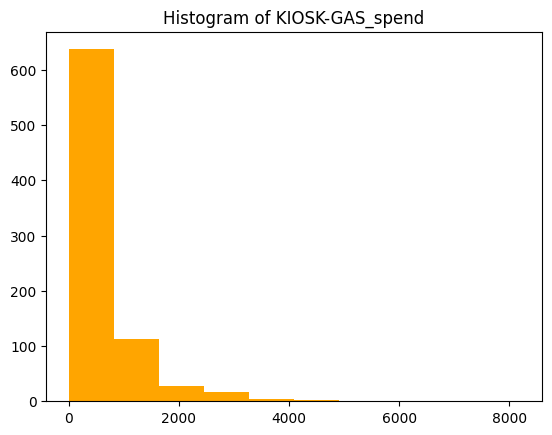

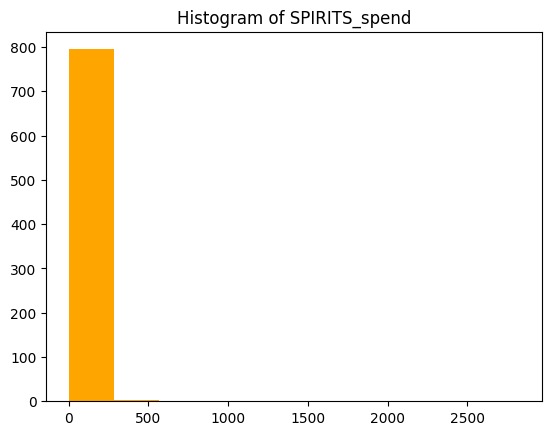

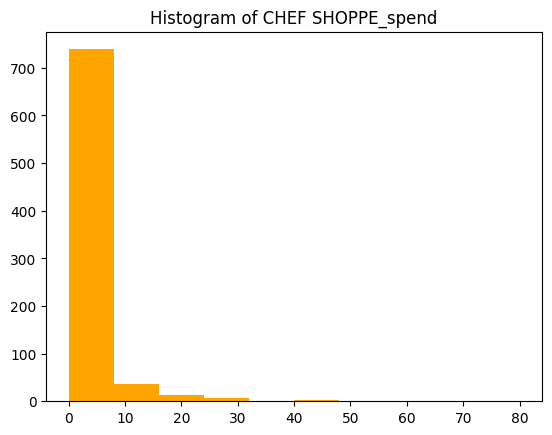

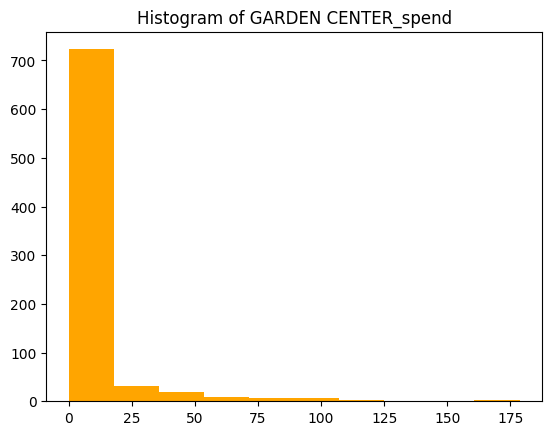

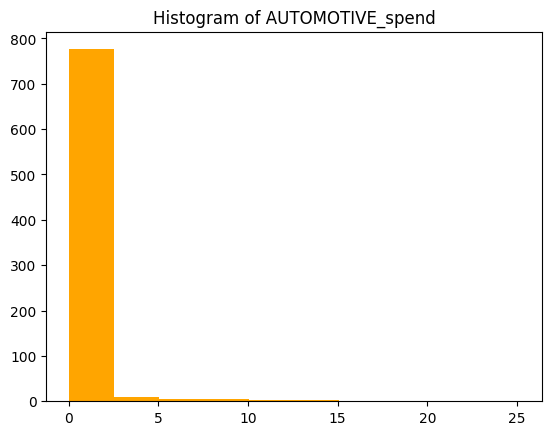

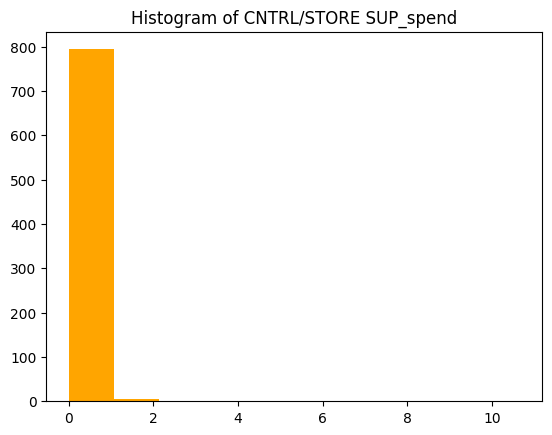

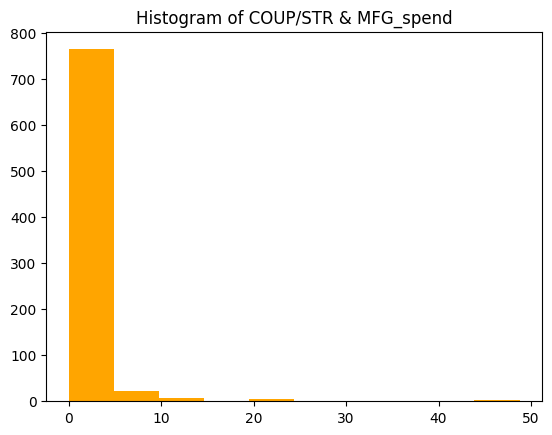

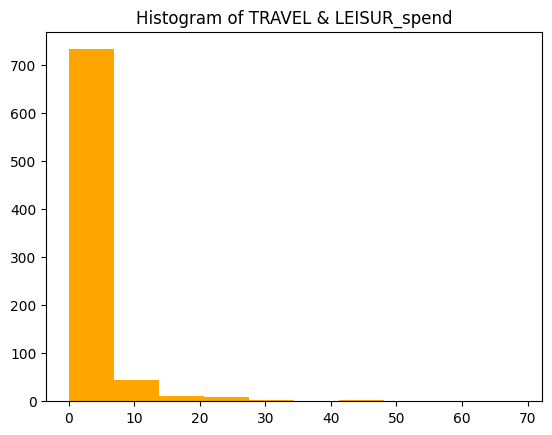

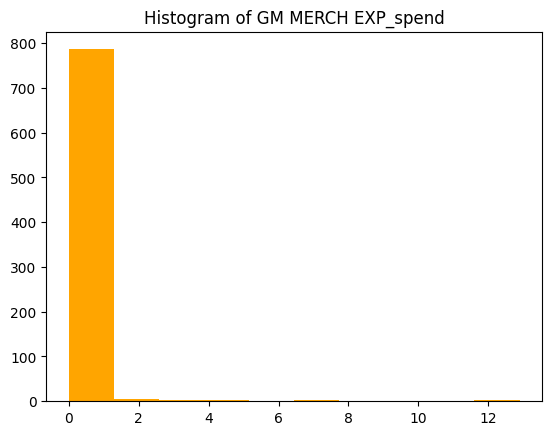

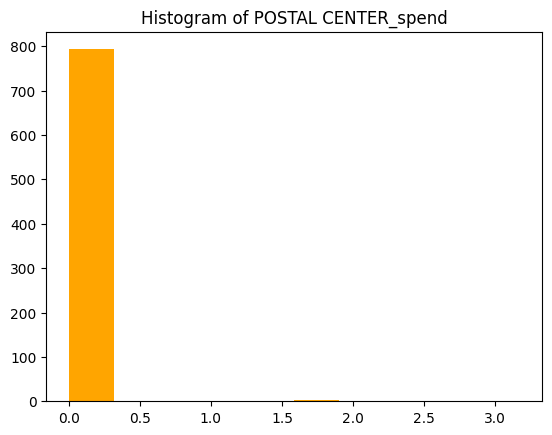

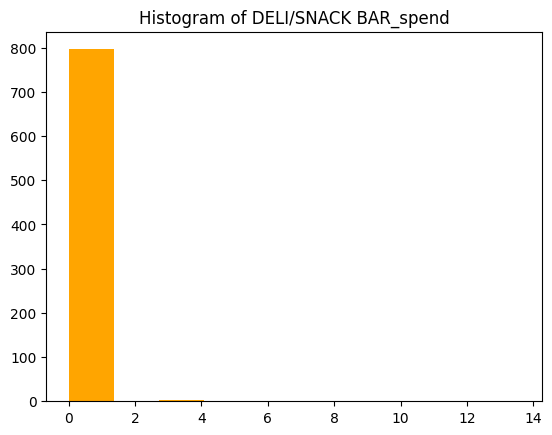

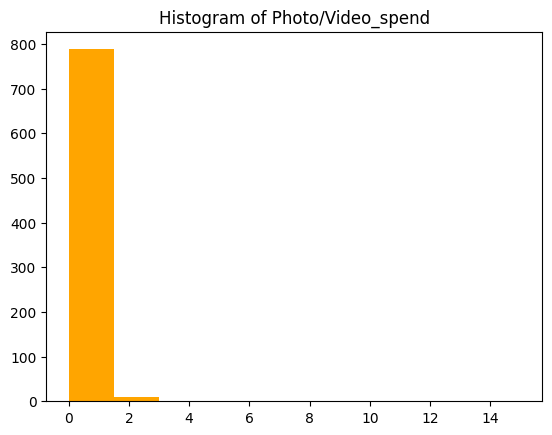

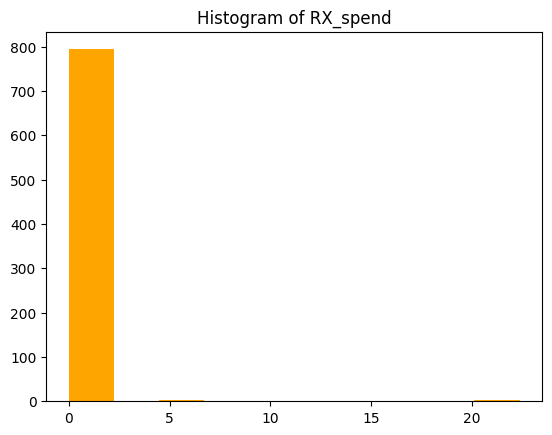

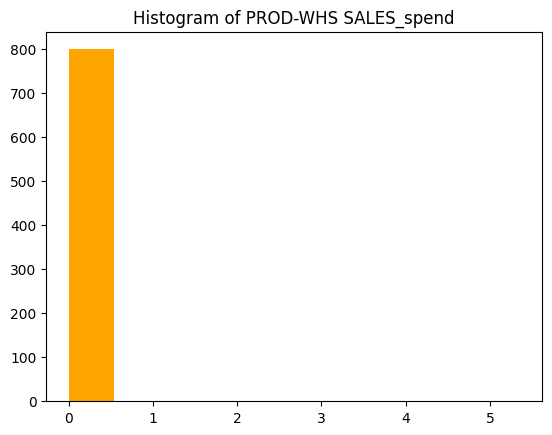

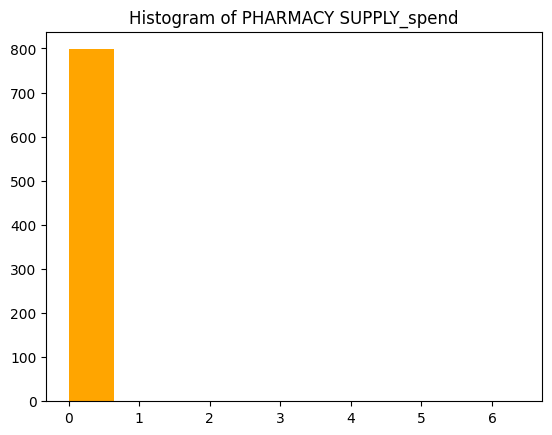

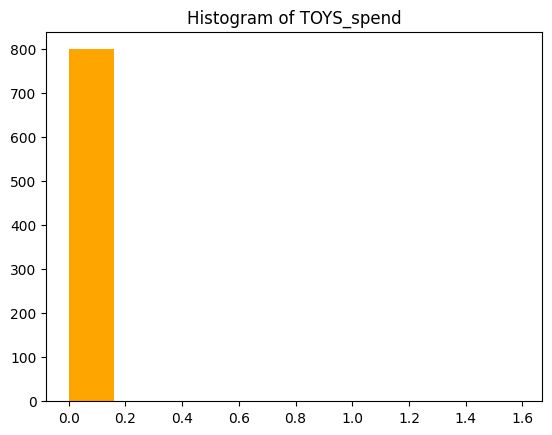

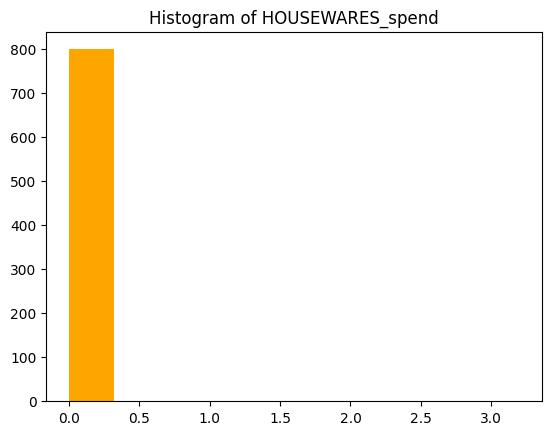

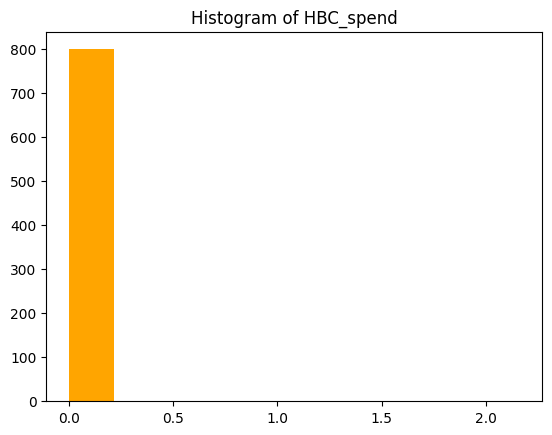

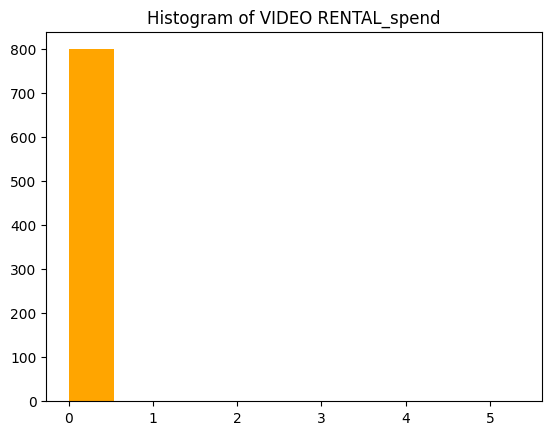

In [11]:
functions.graphs(customer_info.loc[:, customer_info.columns != 'household_key'], graph = 'histogram')

## Feature Engineering

In [12]:
customer_info.head(1)

Unnamed: 0 marital_status_code homeowner_desc  household_key  \
0           0                   A      Homeowner              1   

  marital_status age_group  adult_category_size  has_kids  avg_age  \
0        married    senior              2.00000   0.00000 65.00000   

   avg_income  n_kids  n_household  gender(s)  \
0       42000 0.00000            2    2.00000   

                                            quantity  retail_disc  \
0  [1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, ...     -0.40361   

   coupon_disc  coupon_match_disc  \
0     -0.04665           -0.01514   

                                      sales_value_eu  \
0  [4.27, 3.2, 1.17, 3.97, 2.99, 7.69, 2.68, 1.59...   

                                          department first_transaction_date  \
0  [Groceries, Groceries, Groceries, Delicacies, ...             2021-02-20   

   Groceries_spend  Delicacies_spend  Meat_spend  Bakery_spend  DRUG GM_spend  \
0       3285.02000         226.99000   373.56000     102.01000      568.23000   

   SALAD BAR_spend  MISC SALES TRAN_spend  RESTAURANT_spend  FLORAL_spend  \
0         44.09000               21.40000           4.47000       8.55000   

   COSMETICS_spend  MISC. TRANS._spend  Seafood_spend  KIOSK-GAS_spend  \
0          0.00000             0.00000        0.00000          0.00000   

   SPIRITS_spend  CHEF SHOPPE_spend  GARDEN CENTER_spend  AUTOMOTIVE_spend  \
0        0.00000            0.00000              0.00000           0.00000   

   CNTRL/STORE SUP_spend  COUP/STR & MFG_spend  TRAVEL & LEISUR_spend  \
0                0.00000               0.00000                0.00000   

   GM MERCH EXP_spend  POSTAL CENTER_spend  DELI/SNACK BAR_spend  \
0             0.00000              0.00000               0.00000   

   Photo/Video_spend  RX_spend  PROD-WHS SALES_spend  PHARMACY SUPPLY_spend  \
0            0.00000   0.00000               0.00000                0.00000   

   TOYS_spend  HOUSEWARES_spend  HBC_spend  VIDEO RENTAL_spend  
0     0.00000           0.00000    0.00000             0.00000

Marital Status

In [13]:
replacement_mapping = {
    'A': 0, # married
    'B': 1, # single
    'U': 2 # unknown
}

customer_info['marital_status_code'] = customer_info['marital_status_code'].replace(replacement_mapping)


Replace Homeownere Status by a Code

In [14]:
replacement_mapping = {
    'Owner': 0,
    'Homeowner': 0,
    'Probable Owner': 1,
    'Renter': 2,
    'Probable Renters':3,
    'Probable Renter': 3,
    'Unknown': 4,
}

customer_info['homeowner_code'] = customer_info['homeowner_desc'].replace(replacement_mapping)


Compute total_quantity per Household

In [15]:
customer_info['total_quantity'] = customer_info['quantity'].apply(lambda x: sum(x))

Compute Total Sales Value per Household

In [16]:
customer_info['total_sales_value'] = customer_info['sales_value_eu'].apply(lambda x: round(sum(x), 2))

Create a Unique Departments List

In [17]:
customer_info['unique_dep'] = customer_info['department'].apply(functions.unique_words)

Create a Count of Unique Departments Purchased per Household

In [18]:
customer_info['unique_dep_count'] = customer_info['department'].apply(functions.count_unique_departments)

Dropping Temporary Variables

In [19]:
customer_info = customer_info.drop(['quantity', 'sales_value_eu', 'department', 'unique_dep'], axis = 1)

## Correlation Analysis

Selecting Numeric Columns

In [20]:
info_numeric = customer_info.loc[:, ~customer_info.columns.isin(
    ['homeowner_desc', 'marital_status', 'age_group',
     'first_transaction_date', 'homeowner_code'])]

Ensuring all selected columns are numeric

In [21]:
info_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             801 non-null    int64  
 1   marital_status_code    801 non-null    int64  
 2   household_key          801 non-null    int64  
 3   adult_category_size    801 non-null    float64
 4   has_kids               801 non-null    float64
 5   avg_age                801 non-null    float64
 6   avg_income             801 non-null    int64  
 7   n_kids                 801 non-null    float64
 8   n_household            801 non-null    int64  
 9   gender(s)              801 non-null    float64
 10  retail_disc            801 non-null    float64
 11  coupon_disc            801 non-null    float64
 12  coupon_match_disc      801 non-null    float64
 13  Groceries_spend        801 non-null    float64
 14  Delicacies_spend       801 non-null    float64
 15  Meat_s

In [22]:
cor_spearman = info_numeric.corr(method='spearman')

mask = np.triu(np.ones_like(cor_spearman, dtype=bool))

# Apply the mask to the correlation matrix
cor_spearman_masked = cor_spearman.copy()
cor_spearman_masked[mask] = np.nan

# Plotly heatmap
fig = go.Figure(data=go.Heatmap(
    z=cor_spearman_masked,
    x=cor_spearman.columns,
    y=cor_spearman.columns,
    colorscale='Blues',
    colorbar=dict(title='Spearman Correlation'),
    zmin=-1, zmax=1,
    hoverongaps=False
))

fig.update_layout(
    title='Spearman Correlation Heatmap (Below Diagonal)',
    xaxis_title='Variables',
    yaxis_title='Variables',
    xaxis=dict(tickangle=90,  tickfont=dict(size=10)),
    yaxis=dict(tickangle=0,  tickfont=dict(size=10)),
    width=1300,
    height=1300,
)

# Show the interactive plot
fig.show()


## Export

In [24]:
customer_info.to_csv(f'{path}/801_treated.csv', index=False)